In [1]:
redshift = 2

In [2]:
import os
def main():
    
    print("Current Working Directory " , os.getcwd())
    
    
    try:
        # Change the current working Directory    
        os.chdir("D:\Harvard_Banneker_Summer_2020\Documents")
        print("Directory changed")
    except OSError:
        print("Can't change the Current Working Directory")        
    print("Current Working Directory " , os.getcwd())
    
    # Check if New path exists
    if os.path.exists("D:\Harvard_Banneker_Summer_2020\Documents") :
        # Change the current working Directory    
        os.chdir("D:\Harvard_Banneker_Summer_2020\Documents")
    else:
        print("Can't change the Current Working Directory")    
        
    
    print("Current Working Directory " , os.getcwd())
    
if __name__ == '__main__':
    main()

Current Working Directory  C:\Users\debos\Documents
Directory changed
Current Working Directory  D:\Harvard_Banneker_Summer_2020\Documents
Current Working Directory  D:\Harvard_Banneker_Summer_2020\Documents


In [3]:
from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
import numpy as np
import matplotlib.pyplot as plt
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, metallicity_profile

In [4]:
ids = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12)

import h5py
from pathlib import Path
if Path('galaxy_population_data_'+str(redshift)+'.hdf5').is_file():
    pass
else:
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'w') as f:
        #writing data
        d1 = f.create_dataset('ids', data = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12))
        d2 = f.create_dataset('mean_age', data = my_galaxy_population.get_mean_stellar_age())
        d3 = f.create_dataset('median_age', data = my_galaxy_population.get_median_stellar_age())
        d4 = f.create_dataset('current_SFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0))
        d5 = f.create_dataset('average_SFR_0.5', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0.5))
        d6 = f.create_dataset('average_SFR_1', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=1))
        d7 = f.create_dataset('average_SFR_2', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=2))
        d8 = f.create_dataset('SFR_ratio_1', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=1))
        d9 = f.create_dataset('SFR_ratio_0.5', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=0.5))
        d10 = f.create_dataset('effective_radius', data = my_galaxy_population.get_effective_radius())
        d11 = f.create_dataset('halfmass_radius', data = my_galaxy_population.get_halfmass_rad_stars())
        d12 = f.create_dataset('mean_metallicity', data = my_galaxy_population.get_mean_stellar_metallicity())
        d13 = f.create_dataset('total_mass', data = my_galaxy_population.get_total_stellar_mass())
        d14 = f.create_dataset('halflight_radius_U', data = my_galaxy_population.get_halflight_rad_stars(band='U'))
        d15 = f.create_dataset('halflight_radius_V', data = my_galaxy_population.get_halflight_rad_stars(band='V'))
        d16 = f.create_dataset('halflight_radius_I', data = my_galaxy_population.get_halflight_rad_stars(band='I'))
        d17 = f.create_dataset('halfmass_radius_calculated', data = my_galaxy_population.get_halflight_rad_stars(band='M'))
        d18 = f.create_dataset('current_sSFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0, binwidth=0.01)/10**(my_galaxy_population.get_total_stellar_mass()))
        d19 = f.create_dataset('newbin_current_SFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0, binwidth=0.01))
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    mean_age = f['mean_age'][:]
    median_age = f['median_age'][:]
    current_SFR = f['current_SFR'][:] 
    average_SFR_0_5 = f['average_SFR_0.5'][:]
    average_SFR_1 = f['average_SFR_1'][:]
    average_SFR_2 = f['average_SFR_2'][:]
    SFR_ratio_1 = f['SFR_ratio_1'][:]
    SFR_ratio_0_5 = f['SFR_ratio_0.5'][:]
    effective_radius = f['effective_radius'][:]
    halfmass_radius = f['halfmass_radius'][:]
    mean_metallicity = f['mean_metallicity'][:]
    total_mass = f['total_mass'][:]
    halflight_radius_U = f['halflight_radius_U'][:]
    halflight_radius_V = f['halflight_radius_V'][:]
    halflight_radius_I = f['halflight_radius_I'][:]
    halfmass_radius_calculated = f['halfmass_radius_calculated'][:]
    current_sSFR = f['current_sSFR'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]

In [5]:
'''
import h5py
from pathlib import Path
ids = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12)
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'a') as f:
    #writing data
    del f['halflight_radius_U']
    del f['halflight_radius_V']
    del f['halflight_radius_I']
    del f['halfmass_radius_calculated']
    d14 = f.create_dataset('halflight_radius_U', data = my_galaxy_population.get_halflight_rad_stars(band='U'))
    d15 = f.create_dataset('halflight_radius_V', data = my_galaxy_population.get_halflight_rad_stars(band='V'))
    d16 = f.create_dataset('halflight_radius_I', data = my_galaxy_population.get_halflight_rad_stars(band='I'))
    d17 = f.create_dataset('halfmass_radius_calculated', data = my_galaxy_population.get_halflight_rad_stars(band='M'))

with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'a') as f:
    del f['current_sSFR']
    d18 = f.create_dataset('current_sSFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0, binwidth=0.01)/10**(my_galaxy_population.get_total_stellar_mass()))
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    current_sSFR = f['current_sSFR'][:]
'''

"\nimport h5py\nfrom pathlib import Path\nids = my_galaxy_population.select_galaxies(redshift=2, mass_min=10.5, mass_max=12)\nwith h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'a') as f:\n    #writing data\n    del f['halflight_radius_U']\n    del f['halflight_radius_V']\n    del f['halflight_radius_I']\n    del f['halfmass_radius_calculated']\n    d14 = f.create_dataset('halflight_radius_U', data = my_galaxy_population.get_halflight_rad_stars(band='U'))\n    d15 = f.create_dataset('halflight_radius_V', data = my_galaxy_population.get_halflight_rad_stars(band='V'))\n    d16 = f.create_dataset('halflight_radius_I', data = my_galaxy_population.get_halflight_rad_stars(band='I'))\n    d17 = f.create_dataset('halfmass_radius_calculated', data = my_galaxy_population.get_halflight_rad_stars(band='M'))\n\nwith h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'a') as f:\n    del f['current_sSFR']\n    d18 = f.create_dataset('current_sSFR', data = my_galaxy_population.get

In [6]:
#Define Selections Cuts::

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
extreme_PSB_selection = (median_age<=1.0)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
quiescent_selection = (np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.4)&(median_age<1.6)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.8)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-10.5)
#total_mass[starforming_selection]

C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


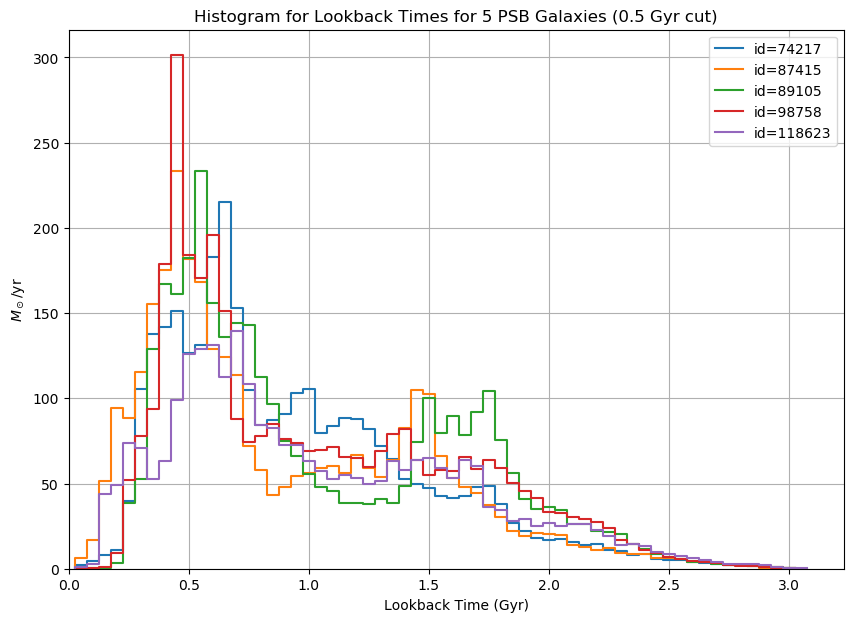

In [16]:
#TNG data cut: initial extreme selection
plt.style.use('default')
plt.figure(figsize=(10,7))
for id in ids[(current_SFR<2)&(average_SFR_0_5>=50)]:
    plt.step(get_star_formation_history(id=id, redshift=2, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=2, plot=False, binwidth=0.05)[1], label='id='+str(id))      
plt.title('Histogram for Lookback Times for 5 PSB Galaxies (0.5 Gyr cut)')
plt.legend()
plt.xlim(0, )
plt.ylim(0, )
plt.grid()
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("$M_\odot$/yr")
plt.show()

C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


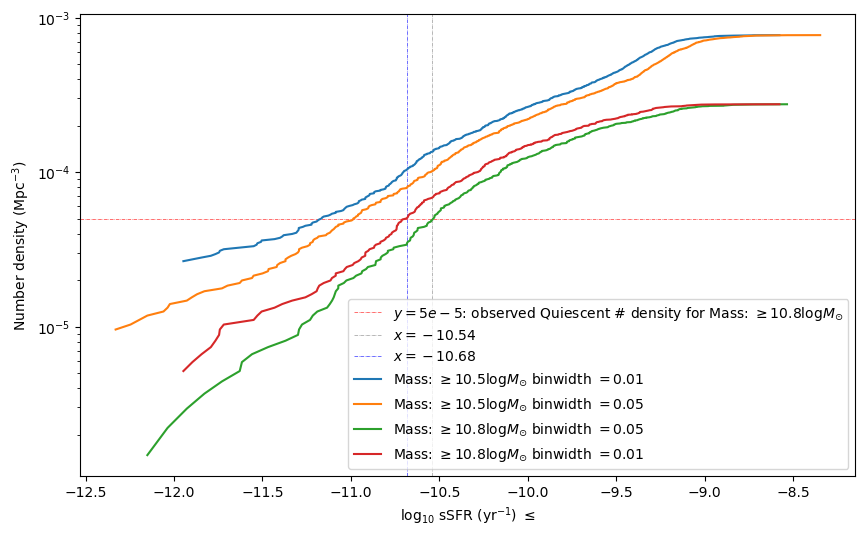

In [53]:
h = 0.6774
a = 1.0 / (1 + redshift)
volume = 110.7**3 #(75 * a / h)**3 
#From: https://www.tng-project.org/about/

#all ids: binwidth = 0.001 #will need to change sSFR from hdf5
zipped_lists_n = zip(newbin_current_SFR/10**(total_mass), ids)
sorted_pairs_n = sorted(zipped_lists_n)

tuples_n = zip(*sorted_pairs_n)
current_SFR_sort_n, ids_sort_n = [list(tuple) for tuple in  tuples_n]

#all ids: binwidth = 0.05
zipped_lists = zip(current_SFR/10**(total_mass), ids)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
current_SFR_sort, ids_sort = [list(tuple) for tuple in  tuples]

#mass>10.8: binwidth = 0.05
zipped_lists_1 = zip(current_SFR[total_mass>=10.8]/10**(total_mass[total_mass>=10.8]), ids[total_mass>=10.8])
sorted_pairs_1 = sorted(zipped_lists_1)

tuples_1 = zip(*sorted_pairs_1)
current_SFR_sort_1, ids_sort_1 = [list(tuple) for tuple in  tuples_1]

#mass>10.8: binwidth = 0.001
zipped_lists_1n = zip(newbin_current_SFR[total_mass>=10.8]/10**(total_mass[total_mass>=10.8]), ids[total_mass>=10.8])
sorted_pairs_1n = sorted(zipped_lists_1n)

tuples_1n = zip(*sorted_pairs_1n)
current_SFR_sort_1n, ids_sort_1n = [list(tuple) for tuple in  tuples_1n]

plt.figure(figsize=(10,6))
plt.axhline(y=5e-5, ls='-.', linewidth=0.4, color='r', label='$y=5e-5$: observed Quiescent # density for Mass: $\geq 10.8 \log M_{\odot}$')
#plt.axvline(x=-11.1, ls='-.', linewidth=0.4, color='r')
#plt.axvline(x=-10.6, ls='-.', linewidth=0.4, color='grey', label='x=-10.6')
plt.axvline(x=-10.54, ls='-.', linewidth=0.4, color='grey', label='$x=-10.54$')
plt.axvline(x=-10.68, ls='-.', linewidth=0.4, color='b', label='$x=-10.68$')
plt.plot(np.log10(current_SFR_sort_n), np.array(range(1, (len(current_SFR_sort_n))+1))/volume, label='Mass: $\geq 10.5 \log M_{\odot}$ binwidth $=0.01$')
plt.plot(np.log10(current_SFR_sort), np.array(range(1, (len(current_SFR_sort))+1))/volume, label='Mass: $\geq 10.5 \log M_{\odot}$ binwidth $=0.05$')
plt.plot(np.log10(current_SFR_sort_1), np.array(range(1, (len(current_SFR_sort_1))+1))/volume, label='Mass: $\geq 10.8 \log M_{\odot}$ binwidth $=0.05$')
plt.plot(np.log10(current_SFR_sort_1n), np.array(range(1, (len(current_SFR_sort_1n))+1))/volume, label='Mass: $\geq 10.8 \log M_{\odot}$ binwidth $=0.01$')
#plt.xlim( ,50)
plt.xlabel('$\log_{10}$ sSFR (yr$^{-1}$) $\leq$')
plt.ylabel('Number density (Mpc$^{-3}$)')
#plt.title('Mass: $\geq 10.5 \log M_{\odot}$')
plt.yscale('log')
#plt.xscale('log')
plt.legend()

C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


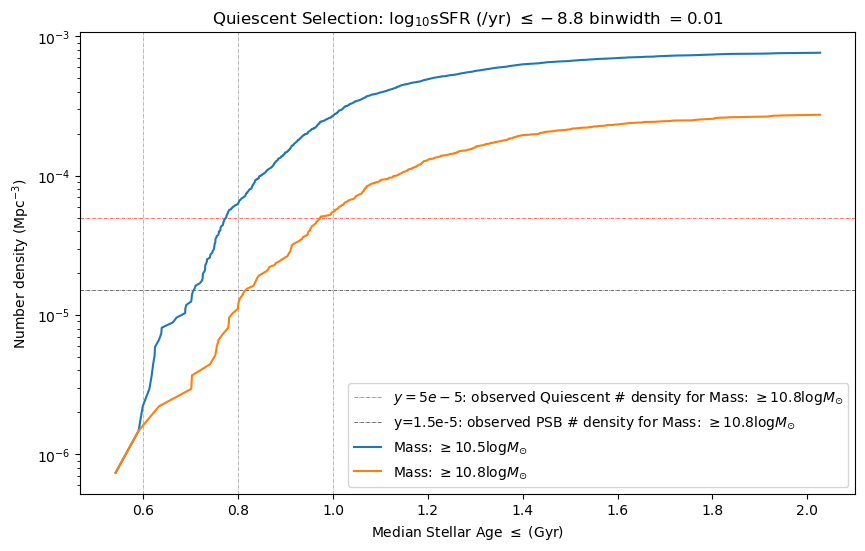

In [81]:
h = 0.6774
a = 1.0 / (1 + redshift)
volume = 110.7**3 #(75 * h / a)**3

zipped_lists = zip(median_age[np.log10(newbin_current_SFR/10**(total_mass))<=-8.8], ids[np.log10(newbin_current_SFR/10**(total_mass))<=-8.8])
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
median_age_sort, ids_sort = [list(tuple) for tuple in  tuples]

zipped_lists_1 = zip(median_age[(total_mass>=10.8)&(np.log10(newbin_current_SFR/10**(total_mass))<=-8.8)], ids[(total_mass>=10.8)&(np.log10(newbin_current_SFR/10**(total_mass))<=-8.8)])
sorted_pairs_1 = sorted(zipped_lists_1)

tuples_1 = zip(*sorted_pairs_1)
median_age_sort_1, ids_sort_1 = [list(tuple) for tuple in  tuples_1]

plt.figure(figsize=(10,6))

plt.axhline(y=5e-5, ls='-.', linewidth=0.4, color='r', label='$y=5e-5$: observed Quiescent # density for Mass: $\geq 10.8 \log M_{\odot}$')
plt.axhline(y=1.5e-5, ls='-.', linewidth=0.4, color='k', label='y=1.5e-5: observed PSB # density for Mass: $\geq 10.8 \log M_{\odot}$')
plt.axvline(x=0.6, ls='-.', linewidth=0.4, color='grey')
plt.axvline(x=0.8, ls='-.', linewidth=0.4, color='grey')
plt.axvline(x=1, ls='-.', linewidth=0.4, color='grey')
#plt.axvline(x=1.17, ls='-.', linewidth=0.2, color='b', label='x=1.17')
#plt.axvline(x=0.9, ls='-.', linewidth=0.2, color='b')
plt.plot(median_age_sort, np.array(range(1, (len(median_age_sort))+1))/volume, label='Mass: $\geq 10.5 \log M_{\odot}$')
plt.plot(median_age_sort_1, np.array(range(1, (len(median_age_sort_1))+1))/volume, label='Mass: $\geq 10.8 \log M_{\odot}$')

#plt.xlim(0 ,50)
plt.xlabel('Median Stellar Age $\leq$ (Gyr)')
plt.ylabel('Number density (Mpc$^{-3}$)')
plt.title('Quiescent Selection: $\log_{10}$sSFR (/yr) $\leq -8.8$ binwidth $=0.01$')
plt.yscale('log')
#plt.xscale('log')
plt.legend()

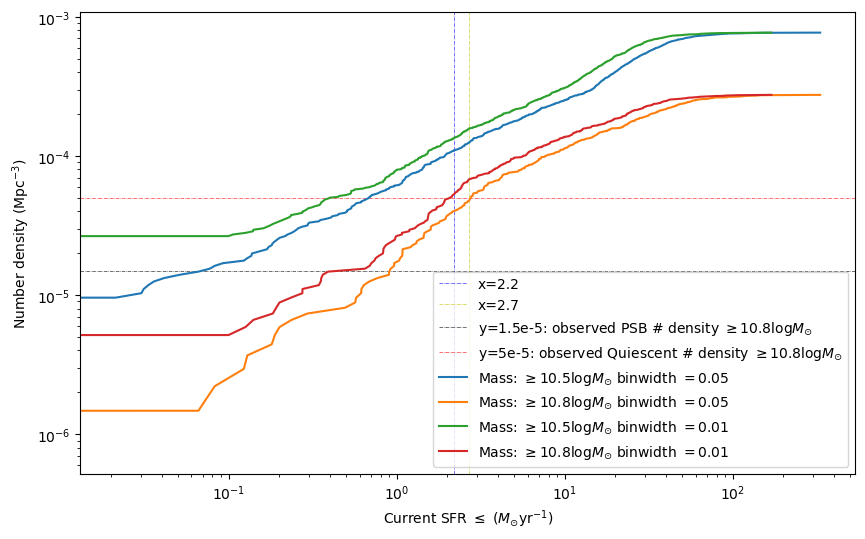

In [55]:
h = 0.6774
volume = 110.7**3

#all ids: binwidth = 0.001
zipped_lists_n = zip(newbin_current_SFR, ids)
sorted_pairs_n = sorted(zipped_lists_n)

tuples_n = zip(*sorted_pairs_n)
current_SFR_sort_n, ids_sort_n = [list(tuple) for tuple in  tuples_n]

#all ids: binwidth = 0.05
zipped_lists = zip(current_SFR, ids)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
current_SFR_sort, ids_sort = [list(tuple) for tuple in  tuples]

#mass>10.8: binwidth = 0.05
zipped_lists_1 = zip(current_SFR[total_mass>=10.8], ids[total_mass>=10.8])
sorted_pairs_1 = sorted(zipped_lists_1)

tuples_1 = zip(*sorted_pairs_1)
current_SFR_sort_1, ids_sort_1 = [list(tuple) for tuple in  tuples_1]

#mass>10.8: binwidth = 0.001
zipped_lists_1n = zip(newbin_current_SFR[total_mass>=10.8], ids[total_mass>=10.8])
sorted_pairs_1n = sorted(zipped_lists_1n)

tuples_1n = zip(*sorted_pairs_1n)
current_SFR_sort_1n, ids_sort_1n = [list(tuple) for tuple in  tuples_1n]

plt.figure(figsize=(10,6))
plt.axvline(x=2.2, ls='-.', linewidth=0.4, color='b', label='x=2.2')
plt.axvline(x=2.7, ls='-.', linewidth=0.4, color='y', label='x=2.7')
plt.axhline(y=1.5e-5, ls='-.', linewidth=0.4, color='k', label='y=1.5e-5: observed PSB # density $\geq 10.8 \log M_{\odot}$')
plt.axhline(y=5e-5, ls='-.', linewidth=0.4, color='r', label='y=5e-5: observed Quiescent # density $\geq 10.8 \log M_{\odot}$')
plt.plot(current_SFR_sort, np.array(range(1, (len(current_SFR_sort))+1))/volume, label='Mass: $\geq 10.5 \log M_{\odot}$ binwidth $=0.05$')
plt.plot(current_SFR_sort_1, np.array(range(1, (len(current_SFR_sort_1))+1))/volume, label='Mass: $\geq 10.8 \log M_{\odot}$ binwidth $=0.05$')
plt.plot(current_SFR_sort_n, np.array(range(1, (len(current_SFR_sort_n))+1))/volume, label='Mass: $\geq 10.5 \log M_{\odot}$ binwidth $=0.01$')
plt.plot(current_SFR_sort_1n, np.array(range(1, (len(current_SFR_sort_1n))+1))/volume, label='Mass: $\geq 10.8 \log M_{\odot}$ binwidth $=0.01$')
#plt.xlim( ,50)
plt.xlabel('Current SFR $\leq$ ($M_{\odot}$yr$^{-1}$)')
plt.ylabel('Number density (Mpc$^{-3}$)')
#plt.title('Mass: $\geq 10.5 \log M_{\odot}$')
plt.yscale('log')
plt.xscale('log')
plt.legend()

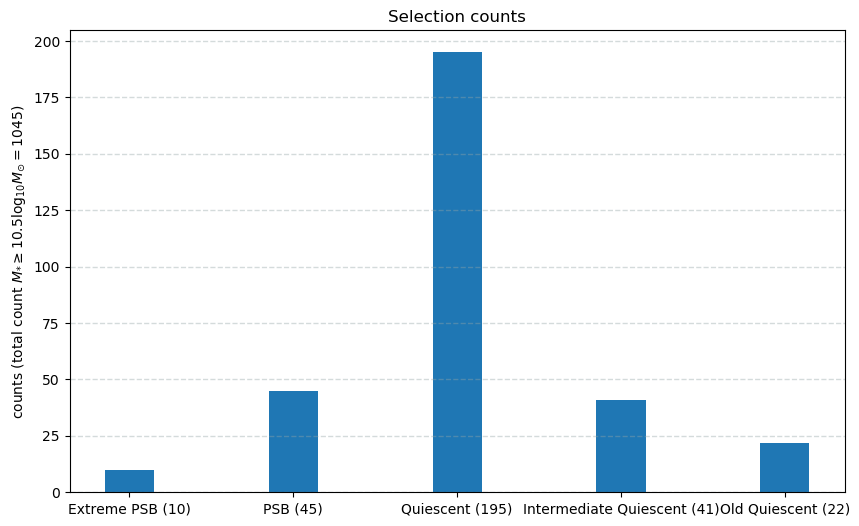

In [11]:
#selection counts comparison bar-plot
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = [len(ids[extreme_PSB_selection]), 
         len(ids[PSB_selection]), 
         len(ids[quiescent_selection]), 
         len(ids[intermediate_quiescent_selection]), 
         len(ids[old_quiescent_selection])]
#data2 = [np.median(halflight_radius_U[quiescent_selection]), np.median(halflight_radius_V[quiescent_selection]), np.median(halflight_radius_I[quiescent_selection])]
#data3 = [np.median(halflight_radius_U[PSB_selection]), np.median(halflight_radius_V[PSB_selection]), np.median(halflight_radius_I[PSB_selection])]
width =0.3
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(data1)), data1, width=width)
#plt.bar(np.arange(len(data2))+ width, data2, width=width, color='red', label='quiescent')
#plt.bar(np.arange(len(data3))+ 2*width, data3, width=width, color='black', label='PSB')
labels = ['Extreme PSB ('+str(len(ids[extreme_PSB_selection]))+')', 
          'PSB ('+str(len(ids[PSB_selection]))+')', 
          'Quiescent ('+str(len(ids[quiescent_selection]))+')', 
          'Intermediate Quiescent ('+str(len(ids[intermediate_quiescent_selection]))+')', 
          'Old Quiescent ('+str(len(ids[old_quiescent_selection]))+')']
plt.xticks(range(len(data1)), labels)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.ylabel('counts (total count $M_{*}\geq10.5\log_{10}M_{\odot}=$'+str(len(ids))+')')
plt.title('Selection counts')
plt.show()

Text(0, 0.5, 'fraction of stellar mass formed')

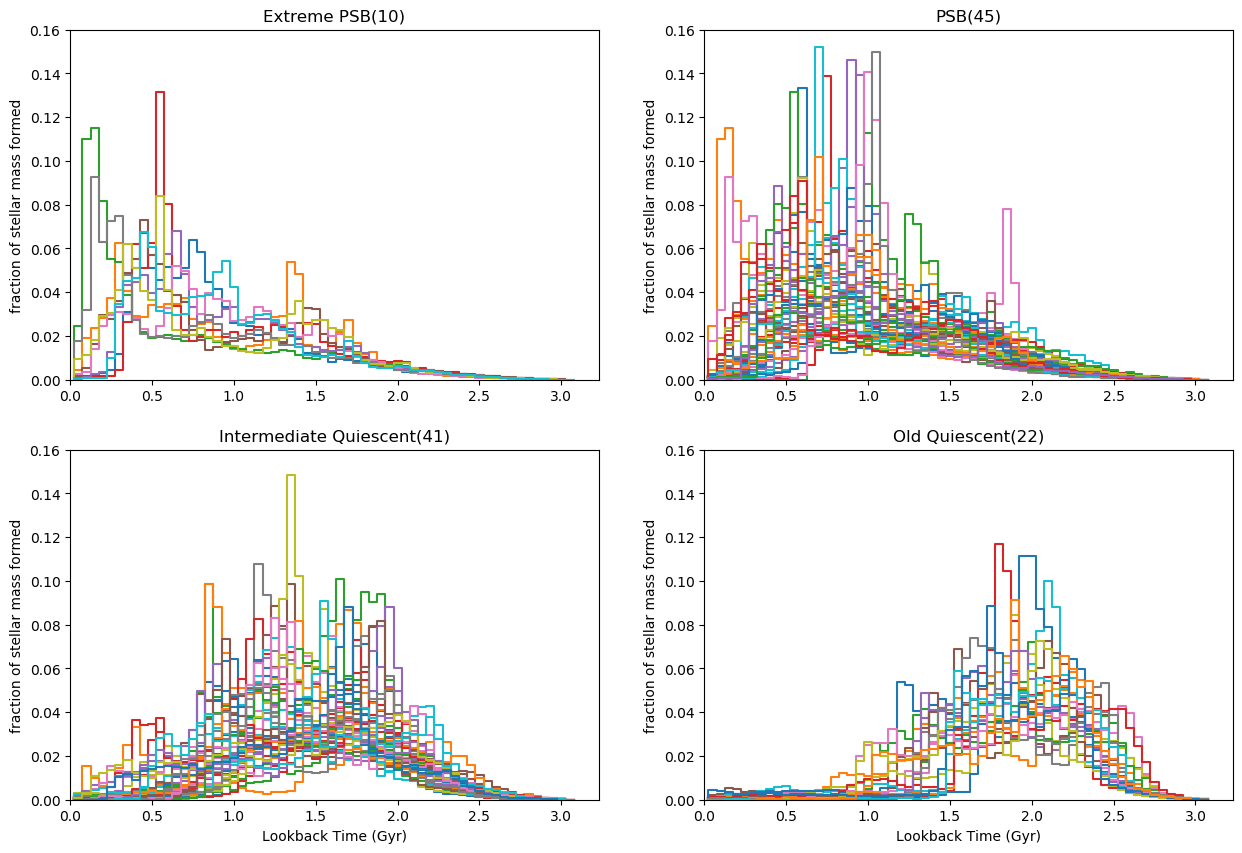

In [13]:
# SFH of all 4 galaxy classes
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='none', sharey='none', figsize=(15,10))

for id in ids[extreme_PSB_selection]:
    ax1.step(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]/sum(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]))
ax1.set_title('Extreme PSB('+str(len(ids[extreme_PSB_selection]))+')')
ax1.set_xlim(0, )
ax1.set_ylim(0, 0.16)
ax1.set_ylabel("fraction of stellar mass formed")

for id in ids[PSB_selection]:
    ax2.step(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]/sum(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]))
ax2.set_title('PSB('+str(len(ids[PSB_selection]))+')')
ax2.set_xlim(0, )
ax2.set_ylim(0, 0.16)
ax2.set_ylabel("fraction of stellar mass formed")

for id in ids[intermediate_quiescent_selection]:
    ax3.step(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]/sum(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]))
ax3.set_title('Intermediate Quiescent('+str(len(ids[intermediate_quiescent_selection]))+')')
ax3.set_xlim(0, )
ax3.set_ylim(0, 0.16)
ax3.set_xlabel("Lookback Time (Gyr)")
ax3.set_ylabel("fraction of stellar mass formed")

for id in ids[old_quiescent_selection]:
    ax4.step(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]/sum(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1]))
ax4.set_title('Old Quiescent('+str(len(ids[old_quiescent_selection]))+')')
ax4.set_xlim(0, )
ax4.set_ylim(0, 0.16)
ax4.set_xlabel("Lookback Time (Gyr)")
ax4.set_ylabel("fraction of stellar mass formed")


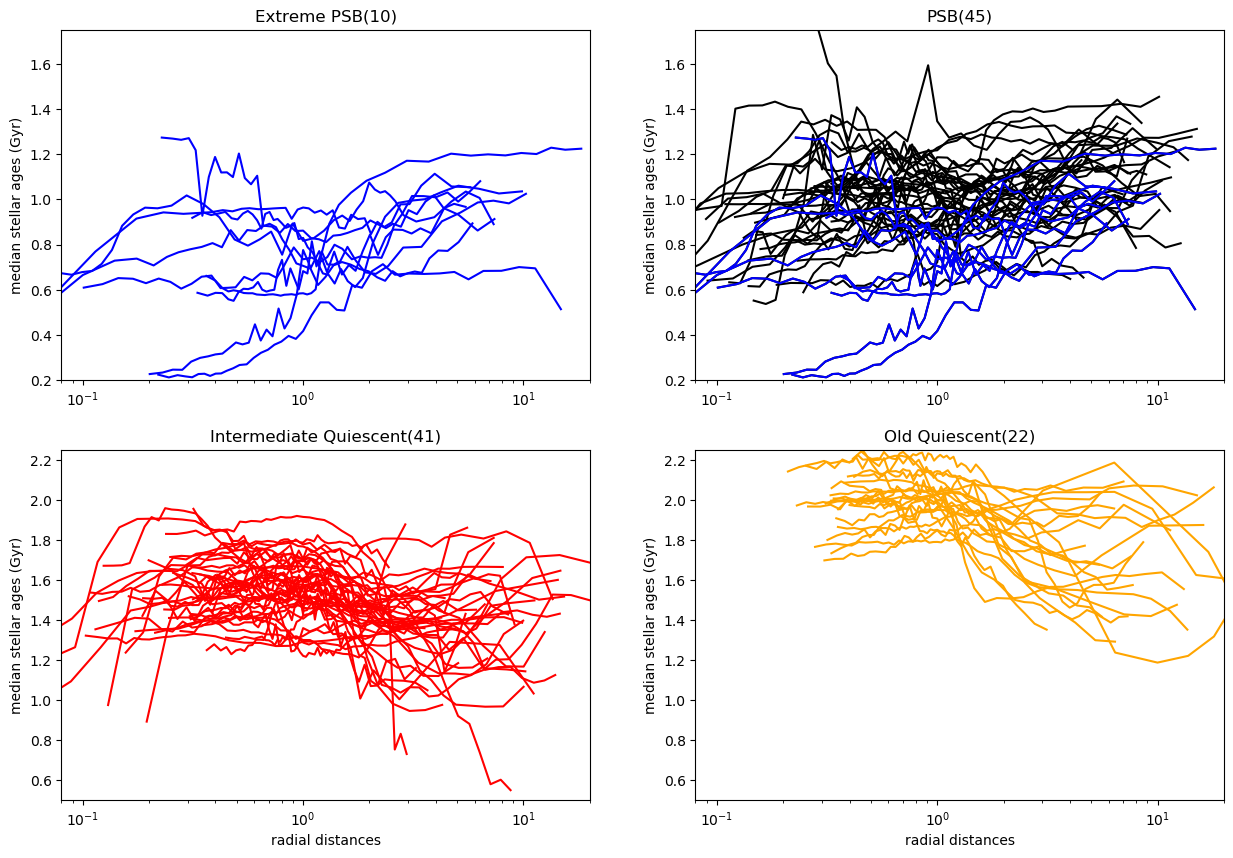

In [30]:
#age profiles
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='none', sharey='none', figsize=(15,10))

for id in ids[extreme_PSB_selection]:
    ax1.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='b')
ax1.set_title('Extreme PSB('+str(len(ids[extreme_PSB_selection]))+')')
ax1.set_xlim(8e-2, 2e1)
ax1.set_ylim(0.2, 1.75)
ax1.set_ylabel("median stellar ages (Gyr)")
ax1.set_xscale('log')
#ax1.set_yscale('log')

for id in ids[PSB_selection]:
    ax2.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='k')
for id in ids[extreme_PSB_selection]:
    ax2.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='b')
ax2.set_title('PSB('+str(len(ids[PSB_selection]))+')')
ax2.set_xlim(8e-2, 2e1)
ax2.set_ylim(0.2, 1.75)
ax2.set_ylabel("median stellar ages (Gyr)")
ax2.set_xscale('log')
#ax2.set_yscale('log')

for id in ids[intermediate_quiescent_selection]:
    ax3.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='r')
ax3.set_title('Intermediate Quiescent('+str(len(ids[intermediate_quiescent_selection]))+')')
ax3.set_xlim(8e-2, 2e1)
ax3.set_ylim(0.5, 2.25)
ax3.set_xlabel("radial distances")
ax3.set_ylabel("median stellar ages (Gyr)")
ax3.set_xscale('log')
#ax3.set_yscale('log')

for id in ids[old_quiescent_selection]:
    ax4.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='orange')
ax4.set_title('Old Quiescent('+str(len(ids[old_quiescent_selection]))+')')
ax4.set_xlim(8e-2, 2e1)
ax4.set_ylim(0.5, 2.25)
ax4.set_xlabel("radial distances")
ax4.set_ylabel("median stellar ages (Gyr)")
ax4.set_xscale('log')
#ax4.set_yscale('log')





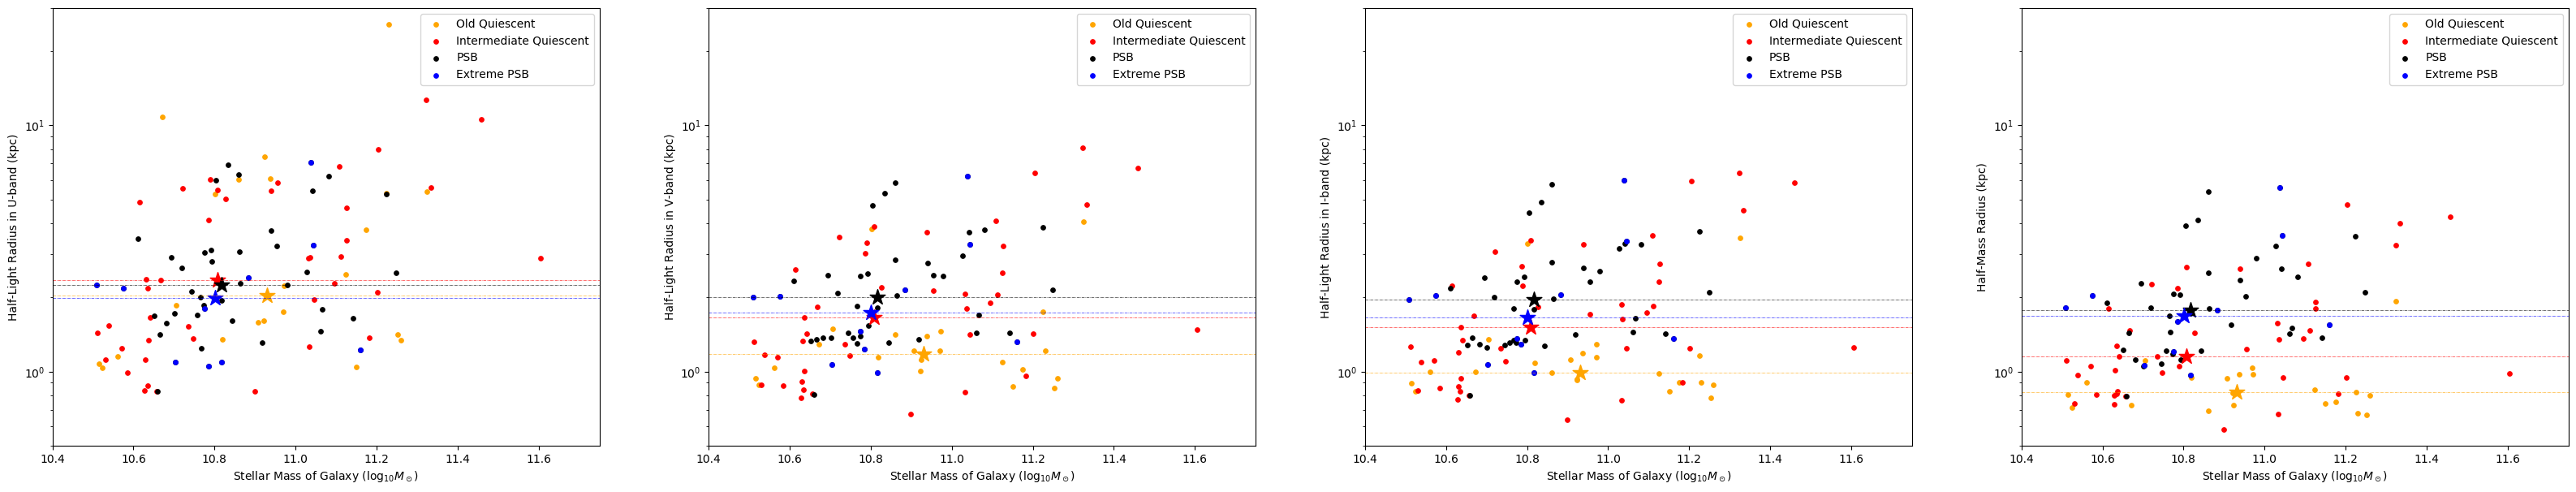

In [60]:
#half-light & half-mass size comparisons
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(40,7))

ax1.scatter((total_mass[old_quiescent_selection]), halflight_radius_U[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax1.scatter((total_mass[intermediate_quiescent_selection]), halflight_radius_U[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax1.scatter((total_mass[PSB_selection]), halflight_radius_U[PSB_selection], c='k', s=15, label='PSB')
ax1.scatter((total_mass[extreme_PSB_selection]), halflight_radius_U[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax1.axhline(y = np.median(halflight_radius_U[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax1.axhline(y = np.median(halflight_radius_U[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax1.axhline(y = np.median(halflight_radius_U[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax1.axhline(y = np.median(halflight_radius_U[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halflight_radius_U[old_quiescent_selection]), c='orange', s=200, marker='*')
ax1.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halflight_radius_U[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax1.scatter(np.median(total_mass[PSB_selection]), np.median(halflight_radius_U[PSB_selection]), c='k', s=200, marker='*')
ax1.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halflight_radius_U[extreme_PSB_selection]), c='b', s=200, marker='*')
ax1.legend()
ax1.set_ylim(0.5e0, 3e1)
ax1.set_xlim(10.4, 11.75)
ax1.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax1.set_ylabel('Half-Light Radius in U-band (kpc)')
ax1.set_yscale('log')

ax2.scatter((total_mass[old_quiescent_selection]), halflight_radius_V[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax2.scatter((total_mass[intermediate_quiescent_selection]), halflight_radius_V[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax2.scatter((total_mass[PSB_selection]), halflight_radius_V[PSB_selection], c='k', s=15, label='PSB')
ax2.scatter((total_mass[extreme_PSB_selection]), halflight_radius_V[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax2.axhline(y = np.median(halflight_radius_V[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax2.axhline(y = np.median(halflight_radius_V[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax2.axhline(y = np.median(halflight_radius_V[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax2.axhline(y = np.median(halflight_radius_V[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halflight_radius_V[old_quiescent_selection]), c='orange', s=200, marker='*')
ax2.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halflight_radius_V[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax2.scatter(np.median(total_mass[PSB_selection]), np.median(halflight_radius_V[PSB_selection]), c='k', s=200, marker='*')
ax2.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halflight_radius_V[extreme_PSB_selection]), c='b', s=200, marker='*')
ax2.legend()
ax2.set_ylim(0.5e0, 3e1)
ax2.set_xlim(10.4, 11.75)
ax2.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax2.set_ylabel('Half-Light Radius in V-band (kpc)')
ax2.set_yscale('log')

ax3.scatter((total_mass[old_quiescent_selection]), halflight_radius_I[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax3.scatter((total_mass[intermediate_quiescent_selection]), halflight_radius_I[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax3.scatter((total_mass[PSB_selection]), halflight_radius_I[PSB_selection], c='k', s=15, label='PSB')
ax3.scatter((total_mass[extreme_PSB_selection]), halflight_radius_I[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax3.axhline(y = np.median(halflight_radius_I[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax3.axhline(y = np.median(halflight_radius_I[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax3.axhline(y = np.median(halflight_radius_I[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax3.axhline(y = np.median(halflight_radius_I[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax3.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halflight_radius_I[old_quiescent_selection]), c='orange', s=200, marker='*')
ax3.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halflight_radius_I[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax3.scatter(np.median(total_mass[PSB_selection]), np.median(halflight_radius_I[PSB_selection]), c='k', s=200, marker='*')
ax3.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halflight_radius_I[extreme_PSB_selection]), c='b', s=200, marker='*')
ax3.legend()
ax3.set_ylim(0.5e0, 3e1)
ax3.set_xlim(10.4, 11.75)
ax3.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax3.set_ylabel('Half-Light Radius in I-band (kpc)')
ax3.set_yscale('log')

ax4.scatter((total_mass[old_quiescent_selection]), halfmass_radius[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax4.scatter((total_mass[intermediate_quiescent_selection]), halfmass_radius[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax4.scatter((total_mass[PSB_selection]), halfmass_radius[PSB_selection], c='k', s=15, label='PSB')
ax4.scatter((total_mass[extreme_PSB_selection]), halfmass_radius[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax4.axhline(y = np.median(halfmass_radius[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax4.axhline(y = np.median(halfmass_radius[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax4.axhline(y = np.median(halfmass_radius[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax4.axhline(y = np.median(halfmass_radius[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax4.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halfmass_radius[old_quiescent_selection]), c='orange', s=200, marker='*')
ax4.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halfmass_radius[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax4.scatter(np.median(total_mass[PSB_selection]), np.median(halfmass_radius[PSB_selection]), c='k', s=200, marker='*')
ax4.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halfmass_radius[extreme_PSB_selection]), c='b', s=200, marker='*')
ax4.legend()
ax4.set_ylim(0.5e0, 3e1)
ax4.set_xlim(10.4, 11.75)
ax4.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax4.set_ylabel('Half-Mass Radius (kpc)')
ax4.set_yscale('log')




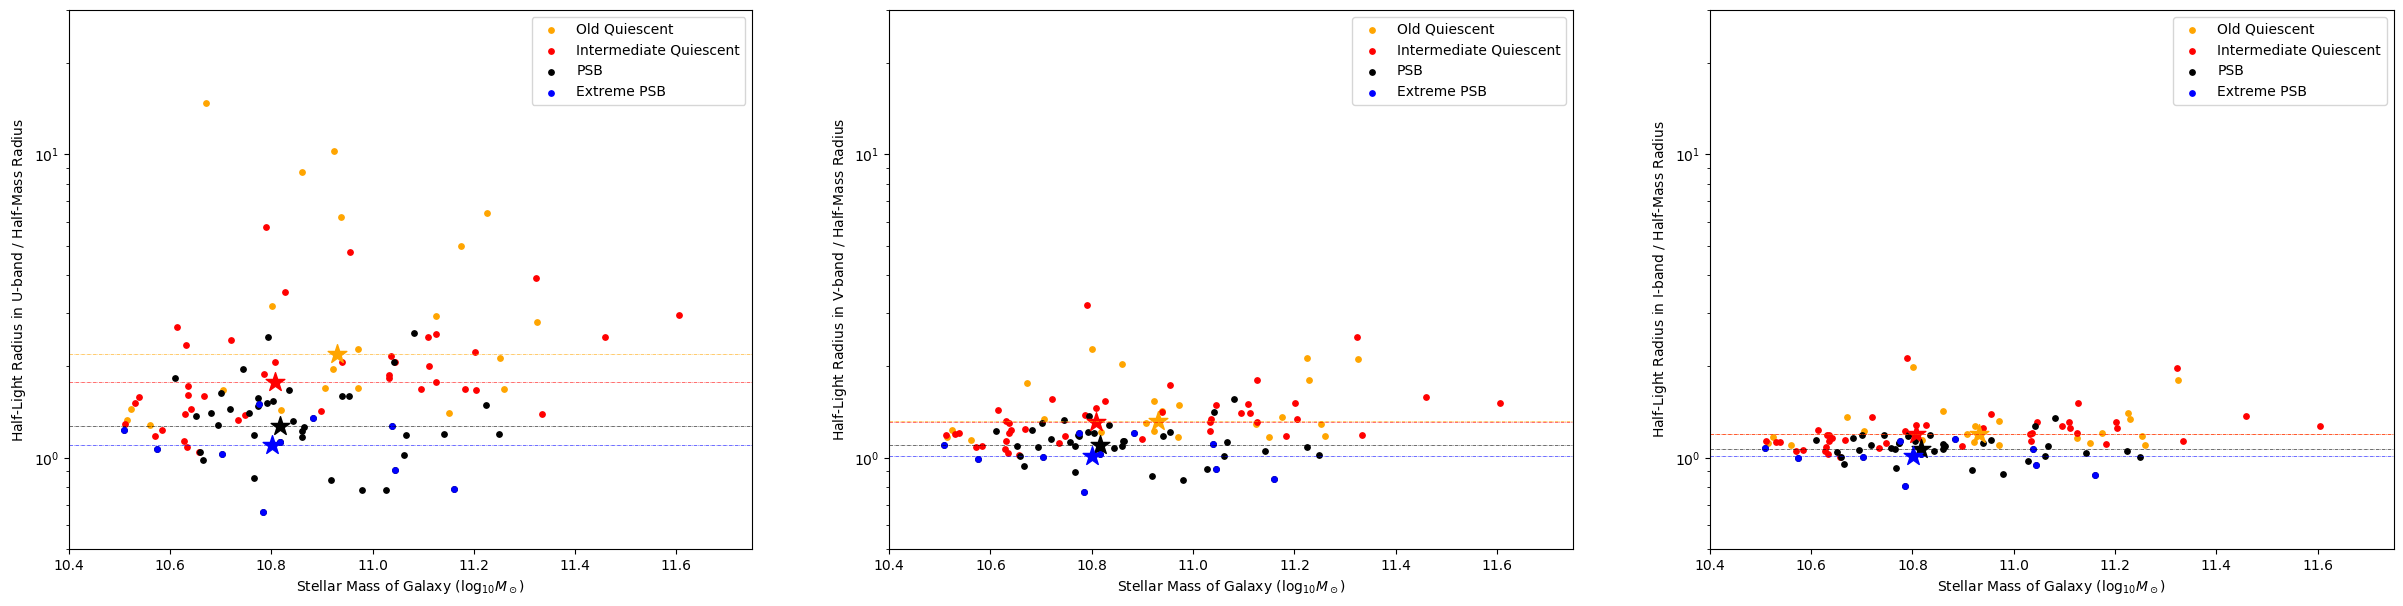

In [63]:
#half-light{U, V, I}/half-mass radii

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(30,7))

ax1.scatter((total_mass[old_quiescent_selection]), halflight_radius_U[old_quiescent_selection]/halfmass_radius[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax1.scatter((total_mass[intermediate_quiescent_selection]), halflight_radius_U[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax1.scatter((total_mass[PSB_selection]), halflight_radius_U[PSB_selection]/halfmass_radius[PSB_selection], c='k', s=15, label='PSB')
ax1.scatter((total_mass[extreme_PSB_selection]), halflight_radius_U[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax1.axhline(y = np.median(halflight_radius_U[old_quiescent_selection]/halfmass_radius[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax1.axhline(y = np.median(halflight_radius_U[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax1.axhline(y = np.median(halflight_radius_U[PSB_selection]/halfmass_radius[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax1.axhline(y = np.median(halflight_radius_U[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halflight_radius_U[old_quiescent_selection]/halfmass_radius[old_quiescent_selection]), c='orange', s=200, marker='*')
ax1.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halflight_radius_U[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax1.scatter(np.median(total_mass[PSB_selection]), np.median(halflight_radius_U[PSB_selection]/halfmass_radius[PSB_selection]), c='k', s=200, marker='*')
ax1.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halflight_radius_U[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection]), c='b', s=200, marker='*')
ax1.legend()
ax1.set_ylim(0.5e0, 3e1)
ax1.set_xlim(10.4, 11.75)
ax1.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax1.set_ylabel('Half-Light Radius in U-band $/$ Half-Mass Radius')
ax1.set_yscale('log')

ax2.scatter((total_mass[old_quiescent_selection]), halflight_radius_V[old_quiescent_selection]/halfmass_radius[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax2.scatter((total_mass[intermediate_quiescent_selection]), halflight_radius_V[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax2.scatter((total_mass[PSB_selection]), halflight_radius_V[PSB_selection]/halfmass_radius[PSB_selection], c='k', s=15, label='PSB')
ax2.scatter((total_mass[extreme_PSB_selection]), halflight_radius_V[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax2.axhline(y = np.median(halflight_radius_V[old_quiescent_selection]/halfmass_radius[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax2.axhline(y = np.median(halflight_radius_V[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax2.axhline(y = np.median(halflight_radius_V[PSB_selection]/halfmass_radius[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax2.axhline(y = np.median(halflight_radius_V[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halflight_radius_V[old_quiescent_selection]/halfmass_radius[old_quiescent_selection]), c='orange', s=200, marker='*')
ax2.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halflight_radius_V[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax2.scatter(np.median(total_mass[PSB_selection]), np.median(halflight_radius_V[PSB_selection]/halfmass_radius[PSB_selection]), c='k', s=200, marker='*')
ax2.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halflight_radius_V[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection]), c='b', s=200, marker='*')
ax2.legend()
ax2.set_ylim(0.5e0, 3e1)
ax2.set_xlim(10.4, 11.75)
ax2.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax2.set_ylabel('Half-Light Radius in V-band $/$ Half-Mass Radius')
ax2.set_yscale('log')

ax3.scatter((total_mass[old_quiescent_selection]), halflight_radius_I[old_quiescent_selection]/halfmass_radius[old_quiescent_selection], c='orange', s=15, label='Old Quiescent')
ax3.scatter((total_mass[intermediate_quiescent_selection]), halflight_radius_I[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection], c='r', s=15, label='Intermediate Quiescent')
ax3.scatter((total_mass[PSB_selection]), halflight_radius_I[PSB_selection]/halfmass_radius[PSB_selection], c='k', s=15, label='PSB')
ax3.scatter((total_mass[extreme_PSB_selection]), halflight_radius_I[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection], c='b', s=15, label='Extreme PSB')
ax3.axhline(y = np.median(halflight_radius_I[old_quiescent_selection]/halfmass_radius[old_quiescent_selection]), color='orange', ls='-.', linewidth=0.4)
ax3.axhline(y = np.median(halflight_radius_I[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection]), c='r', ls='-.', linewidth=0.4)
ax3.axhline(y = np.median(halflight_radius_I[PSB_selection]/halfmass_radius[PSB_selection]), c='k', ls='-.', linewidth=0.4)
ax3.axhline(y = np.median(halflight_radius_I[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection]), c='b', ls='-.', linewidth=0.4)
ax3.scatter(np.median(total_mass[old_quiescent_selection]), np.median(halflight_radius_I[old_quiescent_selection]/halfmass_radius[old_quiescent_selection]), c='orange', s=200, marker='*')
ax3.scatter(np.median(total_mass[intermediate_quiescent_selection]), np.median(halflight_radius_I[intermediate_quiescent_selection]/halfmass_radius[intermediate_quiescent_selection]), c='r', s=200, marker='*')
ax3.scatter(np.median(total_mass[PSB_selection]), np.median(halflight_radius_I[PSB_selection]/halfmass_radius[PSB_selection]), c='k', s=200, marker='*')
ax3.scatter(np.median(total_mass[extreme_PSB_selection]), np.median(halflight_radius_I[extreme_PSB_selection]/halfmass_radius[extreme_PSB_selection]), c='b', s=200, marker='*')
ax3.legend()
ax3.set_ylim(0.5e0, 3e1)
ax3.set_xlim(10.4, 11.75)
ax3.set_xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
ax3.set_ylabel('Half-Light Radius in I-band $/$ Half-Mass Radius')
ax3.set_yscale('log')

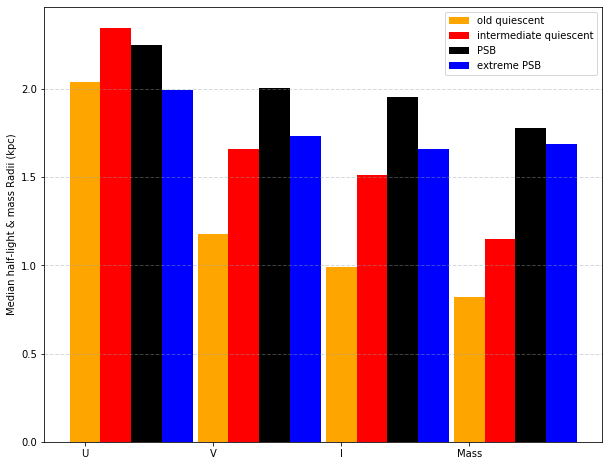

In [9]:
#bar-plot comparison of sizes
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = [np.median(halflight_radius_U[old_quiescent_selection]), np.median(halflight_radius_V[old_quiescent_selection]), np.median(halflight_radius_I[old_quiescent_selection]), np.median(halfmass_radius[old_quiescent_selection])]
data2 = [np.median(halflight_radius_U[intermediate_quiescent_selection]), np.median(halflight_radius_V[intermediate_quiescent_selection]), np.median(halflight_radius_I[intermediate_quiescent_selection]), np.median(halfmass_radius[intermediate_quiescent_selection])]
data3 = [np.median(halflight_radius_U[PSB_selection]), np.median(halflight_radius_V[PSB_selection]), np.median(halflight_radius_I[PSB_selection]), np.median(halfmass_radius[PSB_selection])]
data4 = [np.median(halflight_radius_U[extreme_PSB_selection]), np.median(halflight_radius_V[extreme_PSB_selection]), np.median(halflight_radius_I[extreme_PSB_selection]), np.median(halfmass_radius[extreme_PSB_selection])]
width =0.24
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(data1)), data1, width=width, color='orange', label='old quiescent')
plt.bar(np.arange(len(data2))+ width, data2, width=width, color='red', label='intermediate quiescent')
plt.bar(np.arange(len(data3))+ 2*width, data3, width=width, color='black', label='PSB')
plt.bar(np.arange(len(data4))+ 3*width, data4, width=width, color='blue', label='extreme PSB')

labels = ['U', 'V', 'I', 'Mass']
plt.xticks(range(len(data2)), labels)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.ylabel('Median half-light & mass Radii (kpc)')
plt.legend()
plt.show()
#inference: quiescent galaxies "appear" larger than PSB galaxies in the U-band half-light measurements. 
#However, intermediate & old quiescent galaxies have much smaller half-mass radii.

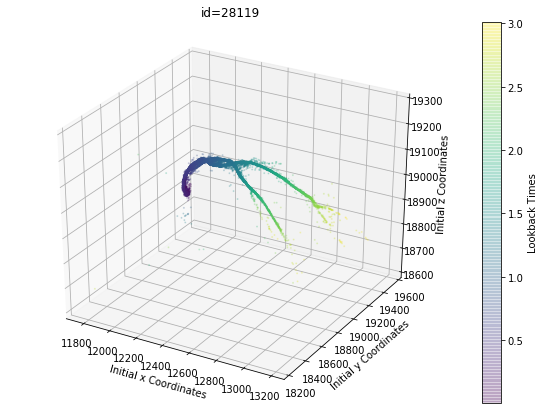

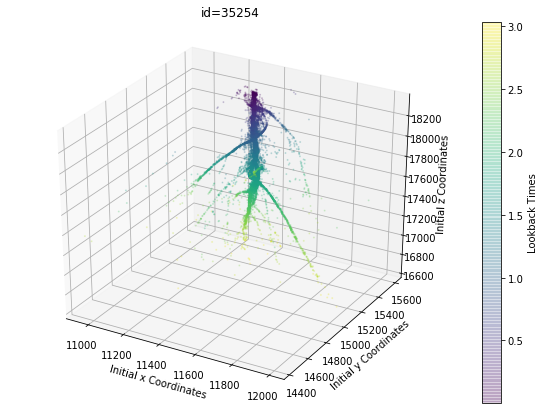

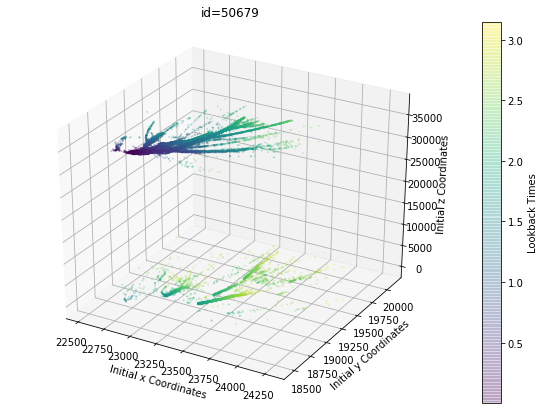

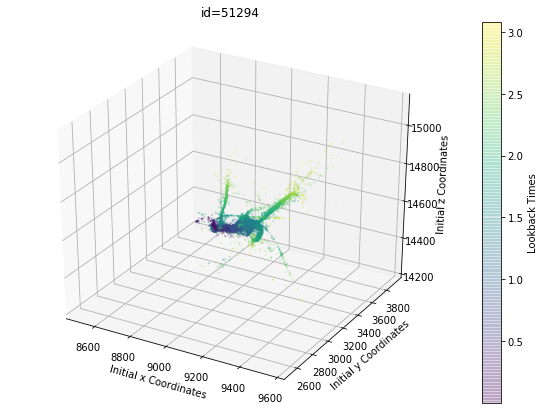

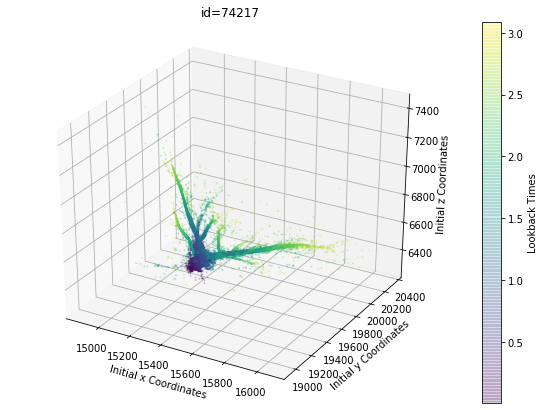

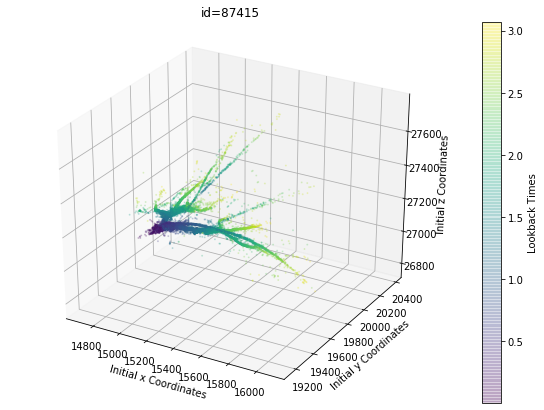

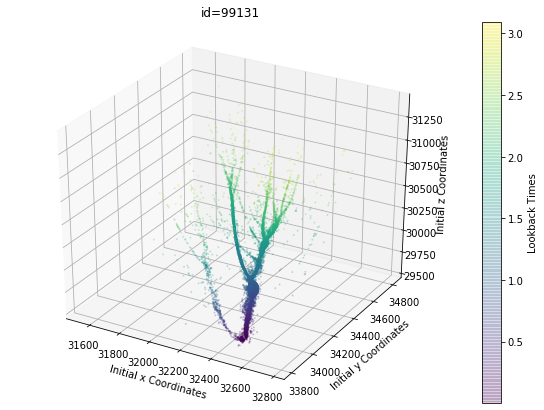

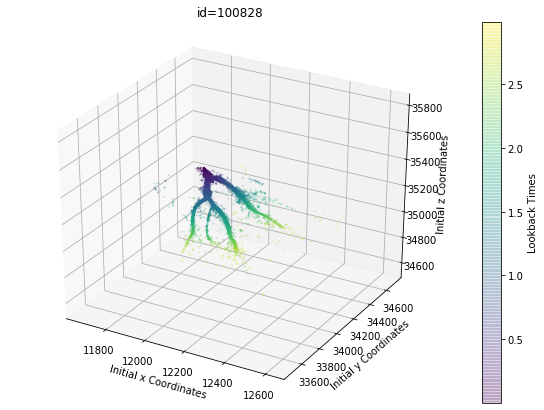

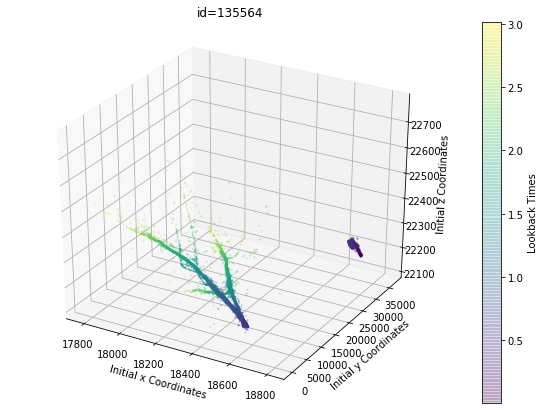

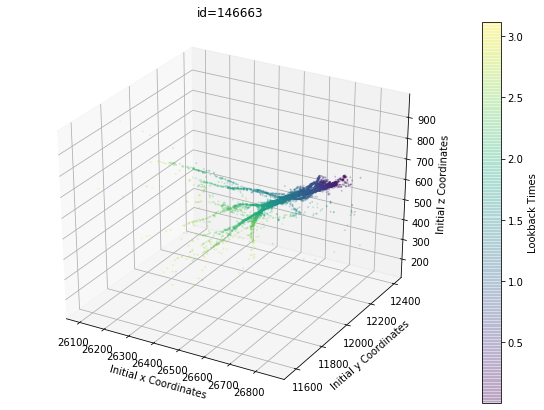

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

for id in ids[extreme_PSB_selection]: #extreme PSB cut#
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')

    x = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['initial_x_coordinates']
    y = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['initial_y_coordinates']
    z = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['initial_z_coordinates']
    ax.title.set_text('id='+str(id))
    p = ax.scatter(x, y, z, s=1, c=get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['LookbackTime'], alpha=0.2)
    fig.colorbar(p, label='Lookback Times')
    ax.set_xlabel('Initial x Coordinates')
    ax.set_ylabel('Initial y Coordinates')
    ax.set_zlabel('Initial z Coordinates')

    plt.show()

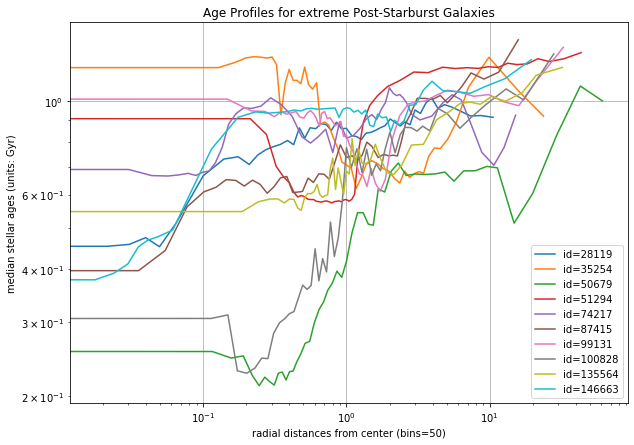

In [8]:
plt.figure(figsize=(10,7))
for id in ids[extreme_PSB_selection]:
    plt.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][:], age_profile(id=id, redshift=redshift, n_bins=50)[0][:], label='id='+str(id))
plt.legend()
plt.grid()    
plt.title('Age Profiles for extreme Post-Starburst Galaxies')
plt.xlabel('radial distances from center (bins=50)')
plt.ylabel('median stellar ages (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

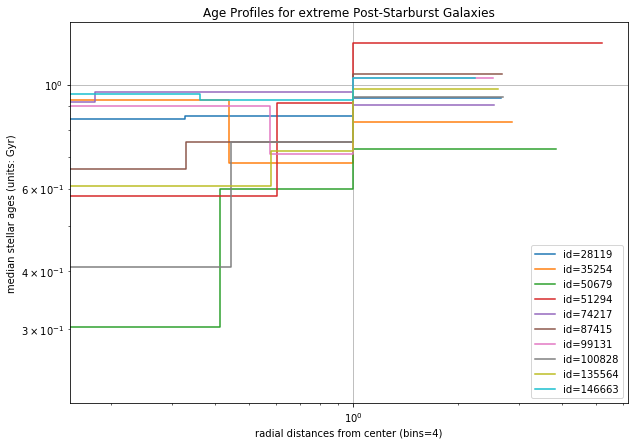

In [18]:
plt.figure(figsize=(10,7))
for id in ids[extreme_PSB_selection]:
    plt.step(age_profile(id=id, redshift=redshift, n_bins=4)[1], age_profile(id=id, redshift=redshift, n_bins=4)[0], label='id='+str(id))
plt.legend()
plt.grid()    
plt.title('Age Profiles for extreme Post-Starburst Galaxies')
plt.xlabel('radial distances from center (bins=4)')
plt.ylabel('median stellar ages (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

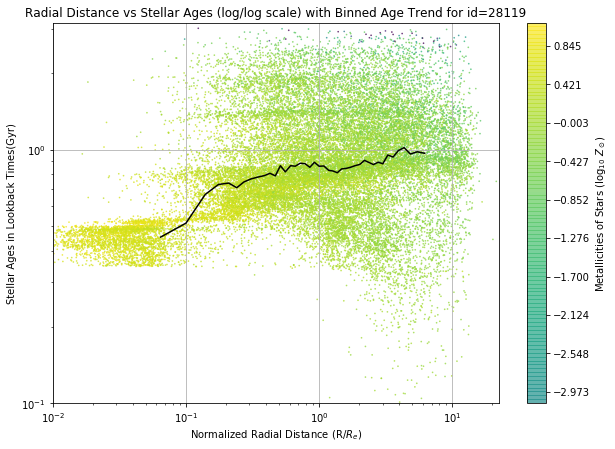

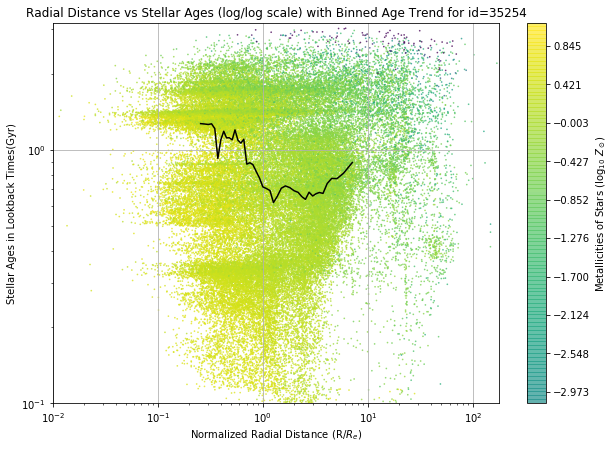

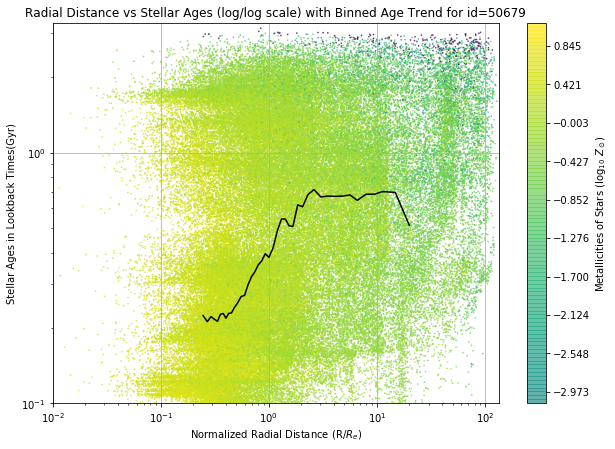

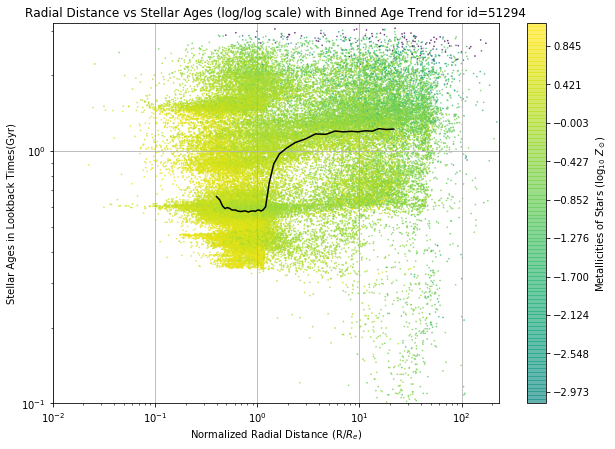

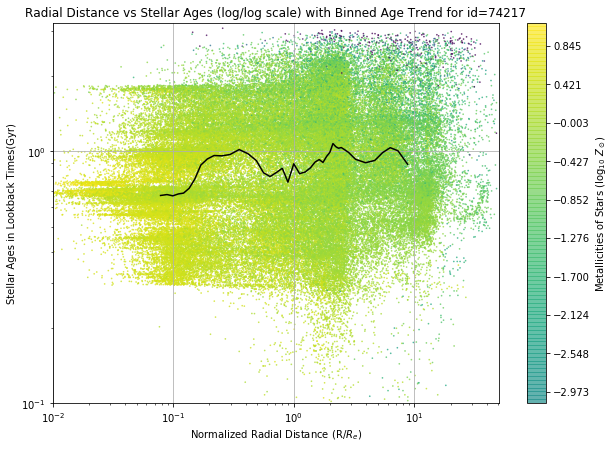

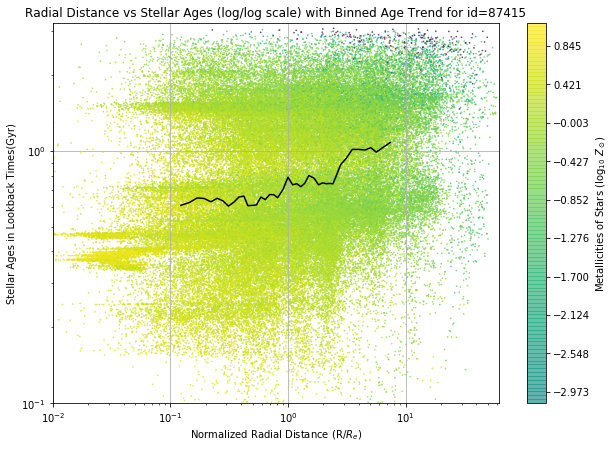

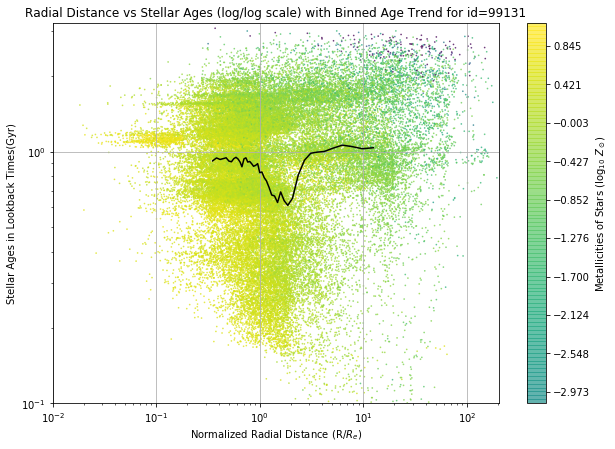

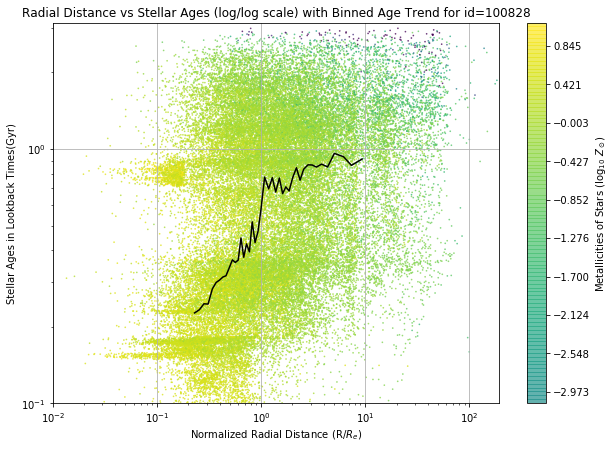

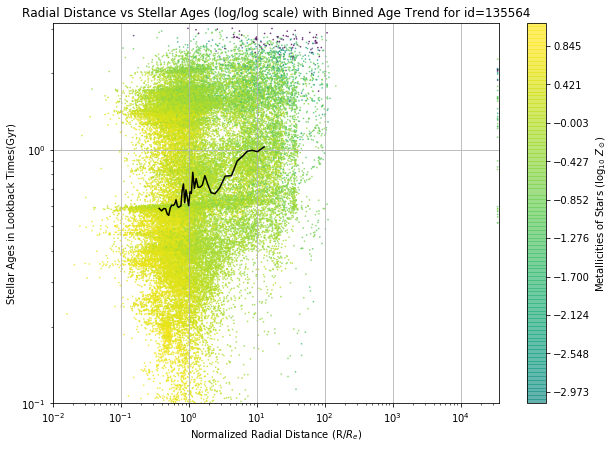

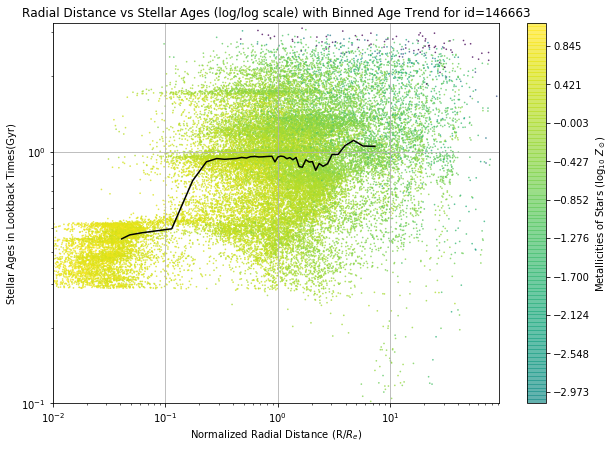

In [9]:
#post starburst galaxies
for id in ids[extreme_PSB_selection]:
    age_profile(id=id, redshift=redshift, n_bins=50, scatter=True)

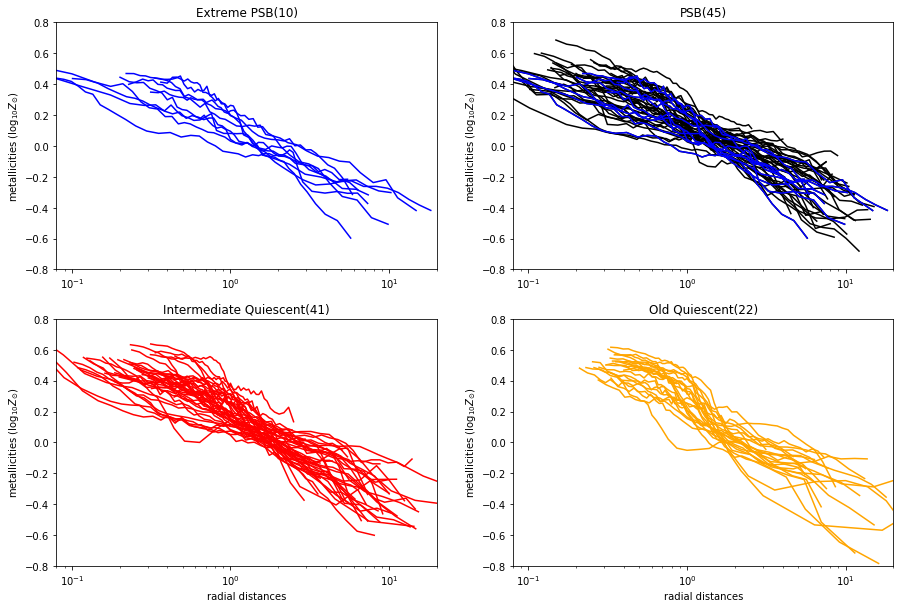

In [24]:
#age profiles
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='none', sharey='none', figsize=(15,10))

for id in ids[extreme_PSB_selection]:
    ax1.plot(metallicity_profile(id=id, redshift=2, n_bins=50)[1][4:-4], np.log10(metallicity_profile(id=id, redshift=2, n_bins=50)[0][4:-4]), c='b')
ax1.set_title('Extreme PSB('+str(len(ids[extreme_PSB_selection]))+')')
ax1.set_xlim(8e-2, 2e1)
ax1.set_ylim(-0.8, 0.8)
ax1.set_ylabel("metallicities ($\log_{10} Z_{\odot}$)")
ax1.set_xscale('log')
#ax1.set_yscale('log')

for id in ids[PSB_selection]:
    ax2.plot(metallicity_profile(id=id, redshift=2, n_bins=50)[1][4:-4], np.log10(metallicity_profile(id=id, redshift=2, n_bins=50)[0][4:-4]), c='k')
for id in ids[extreme_PSB_selection]:
    ax2.plot(metallicity_profile(id=id, redshift=2, n_bins=50)[1][4:-4], np.log10(metallicity_profile(id=id, redshift=2, n_bins=50)[0][4:-4]), c='b')
ax2.set_title('PSB('+str(len(ids[PSB_selection]))+')')
ax2.set_xlim(8e-2, 2e1)
ax2.set_ylim(-0.8, 0.8)
ax2.set_ylabel("metallicities ($\log_{10} Z_{\odot}$)")
ax2.set_xscale('log')
#ax2.set_yscale('log')

for id in ids[intermediate_quiescent_selection]:
    ax3.plot(metallicity_profile(id=id, redshift=2, n_bins=50)[1][4:-4], np.log10(metallicity_profile(id=id, redshift=2, n_bins=50)[0][4:-4]), c='r')
ax3.set_title('Intermediate Quiescent('+str(len(ids[intermediate_quiescent_selection]))+')')
ax3.set_xlim(8e-2, 2e1)
ax3.set_ylim(-0.8, 0.8)
ax3.set_xlabel("radial distances")
ax3.set_ylabel("metallicities ($\log_{10} Z_{\odot}$)")
ax3.set_xscale('log')
#ax3.set_yscale('log')

for id in ids[old_quiescent_selection]:
    ax4.plot(metallicity_profile(id=id, redshift=2, n_bins=50)[1][4:-4], np.log10(metallicity_profile(id=id, redshift=2, n_bins=50)[0][4:-4]), c='orange')
ax4.set_title('Old Quiescent('+str(len(ids[old_quiescent_selection]))+')')
ax4.set_xlim(8e-2, 2e1)
ax4.set_ylim(-0.8, 0.8)
ax4.set_xlabel("radial distances")
ax4.set_ylabel("metallicities ($\log_{10} Z_{\odot}$)")
ax4.set_xscale('log')
#ax4.set_yscale('log')


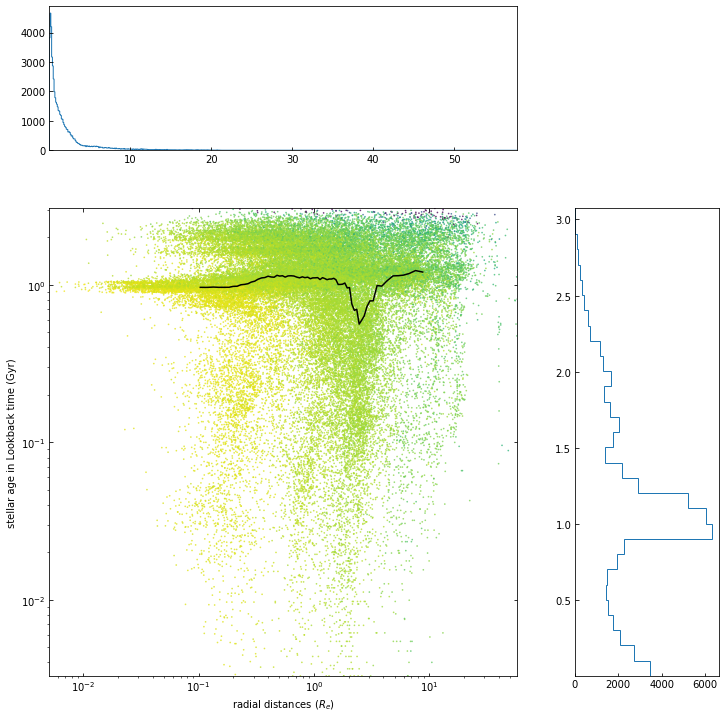

In [24]:
#trial incomplete

id=1


import numpy as np
import matplotlib.pyplot as plt
import scipy

# populating dictionary
stellar_data = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)

#getting data from arrays
LookbackTime = stellar_data['LookbackTime']
dx = stellar_data['relative_x_coordinates']
dy = stellar_data['relative_y_coordinates']
dz = stellar_data['relative_z_coordinates']
metallicity = stellar_data['stellar_metallicities']
R = (dx**2 + dy**2 + dz**2)**(1/2)

n_bins = 75
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(R, (100/n_bins)*i) 
R_e = np.nanmedian(R)
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(R, LookbackTime, 'median', bins=radial_percentiles)

x = R/R_e #np.log10(R/R_e)
y = LookbackTime #np.log10(LookbackTime)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.08


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(10, 10))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=True)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=True)

# the scatter plot:
ax_scatter.scatter(x, y, s=0.5, alpha=0.7, c=np.log10(metallicity))
ax_scatter.plot(np.array(radial_percentiles[1:]/R_e)[4:-4], np.array(statistic)[4:-4], c='k')
#ax_scatter.colorbar(boundaries=np.linspace(-3.1,1.1,100), label='Metallicities of Stars ($\log_{10}$ $Z_\odot$)')
ax_scatter.set_xlabel("radial distances ($R_e$)")
ax_scatter.set_ylabel("stellar age in Lookback time (Gyr)")
ax_scatter.set_xscale('log')
ax_scatter.set_yscale('log')

# now determine nice limits by hand:
binwidth = 0.10
#lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((min(x), max(x)))
ax_scatter.set_ylim((min(y), max(y)))

x_bins = np.arange(min(x), max(x) + binwidth, binwidth)
y_bins = np.arange(min(y), max(y) + binwidth, binwidth)
ax_histx.hist(x, bins=x_bins, histtype = 'step') #add xlabels
ax_histy.hist(y, bins=y_bins, histtype = 'step', orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()